# Preprocessing

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics import tsaplots
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

## Loading Data

In [2]:
DIA= pd.read_csv('DIA (2).csv', index_col='Date', parse_dates=['Date'])

# Exploring the Data

In [3]:
DIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,116.03125,116.031250,113.000000,113.500000,70.035995,1278800
2000-01-04,112.28125,112.968750,109.765625,109.765625,67.731735,1535700
2000-01-05,110.00000,112.375000,109.031250,111.187500,68.609116,2007000
2000-01-06,111.40625,113.171875,111.187500,111.750000,68.956184,2639500
2000-01-07,113.31250,115.562500,113.218750,115.500000,71.270126,3767400


In [4]:
DIA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2000-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5030 non-null   float64
 1   High       5030 non-null   float64
 2   Low        5030 non-null   float64
 3   Close      5030 non-null   float64
 4   Adj Close  5030 non-null   float64
 5   Volume     5030 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


## Preprocessing

In [5]:
DIA.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
DIA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,116.031250,116.031250,113.000000,113.500000,70.035995,1278800
2000-01-04,112.281250,112.968750,109.765625,109.765625,67.731735,1535700
2000-01-05,110.000000,112.375000,109.031250,111.187500,68.609116,2007000
2000-01-06,111.406250,113.171875,111.187500,111.750000,68.956184,2639500
2000-01-07,113.312500,115.562500,113.218750,115.500000,71.270126,3767400
...,...,...,...,...,...,...
2019-12-23,285.339996,285.660004,285.149994,285.329987,275.649017,2564700
2019-12-24,285.630005,285.630005,284.869995,285.010010,275.339935,611600
2019-12-26,285.230011,286.100006,285.200012,286.059998,276.354248,931600


In [7]:
DIA.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
drop = ['Open', 'High', 'Low', 'Close', 'Volume']
DIA = DIA.drop(columns = drop)

In [9]:
type(DIA)

pandas.core.frame.DataFrame

In [10]:
DIA.describe()

,Adj Close
count,5030.000000
mean,113.079029
std,57.796811
min,47.106049
25%,68.778797
50%,89.497341
75%,146.094704
max,276.615204


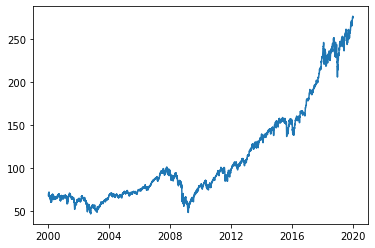

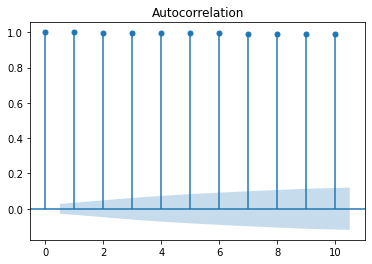

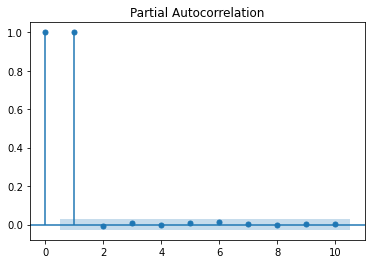

In [11]:
plt.plot(DIA)
tsaplots.plot_acf(DIA['Adj Close'], lags=10)
tsaplots.plot_pacf(DIA['Adj Close'], lags=10)

plt.show()

### Testing for stationarity with KPSS and ADFuller

In [12]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
kpss(DIA)

C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(12.416714303935343,
 0.01,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [13]:
adfuller(DIA)

(2.483535472275075,
 0.9990443483166125,
 19,
 5010,
 {'1%': -3.4316559188949403,
  '5%': -2.8621170751906178,
  '10%': -2.567077177780168},
 15653.847899151604)

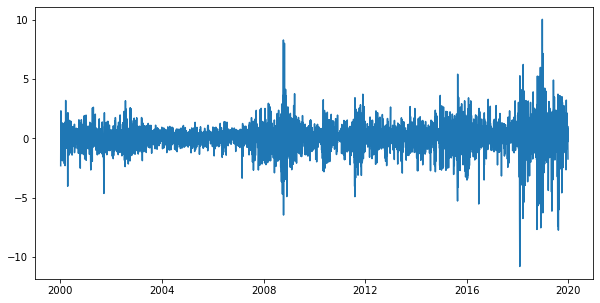

In [14]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(DIA.diff().dropna())

In [15]:
kpss(DIA.diff().dropna())

C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(0.8545712922665148,
 0.01,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [16]:
adfuller(DIA.diff().dropna())

(-17.33836659970345,
 5.358340209377672e-30,
 18,
 5010,
 {'1%': -3.4316559188949403,
  '5%': -2.8621170751906178,
  '10%': -2.567077177780168},
 15653.663800936754)

In [17]:
DIA_log = np.log(DIA)

In [18]:
DIA_log.head()

,Adj Close
Date,
2000-01-03,4.249009
2000-01-04,4.215555
2000-01-05,4.228425
2000-01-06,4.233471
2000-01-07,4.266477


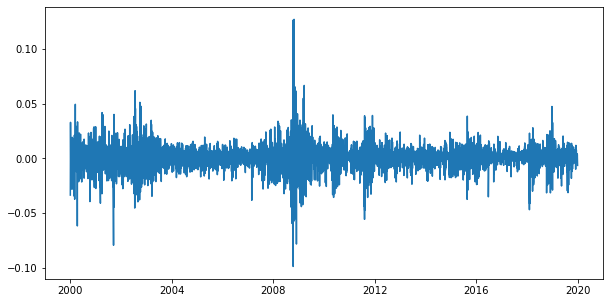

In [19]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(DIA_log.diff())

In [20]:
kpss(DIA_log.diff().dropna())

C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.28430729819576245,
 0.1,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [21]:
adfuller(DIA_log.diff().dropna())

(-15.975795515301575,
 6.923154884126501e-29,
 21,
 5007,
 {'1%': -3.431656701752533,
  '5%': -2.862117421053178,
  '10%': -2.5670773618962612},
 -30675.67419281561)

In [22]:
DIA_log_diff = DIA_log.diff().dropna()

Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary.

### Splitting into training data and testing data

In [29]:
DIA['Adj Close'] = pd.to_datetime(DIA['Adj Close'])
DIA.set_index('Adj Close', inplace=True)

In [30]:
DIA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 1970-01-01 00:00:00.000000070 to 1970-01-01 00:00:00.000000274
Empty DataFrame

In [31]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    split=int(len(data) * 0.85) 
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [32]:
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [33]:
# Now, we choose a couple of values to try for each parameter: p_values, d_values and q_values
# Fill in the blanks as appropriate
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [40]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
evaluate_models(DIA_log, p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [35]:
from pmdarima.arima import auto_arima

In [36]:
arima = auto_arima(DIA_log_diff, start_p = 0, d = 1, start_q = 0, max_p = 3, max_d = 3, max_q = 3, start_P = 0, D = 1, start_Q = 0, max_P = 3, max_D = 3, max_Q =3, seasonal = True, error_action = 'warn', trace = True, supress_warnings = True, stepwise = True, random_state = 42, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-26947.729, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-28454.609, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-26949.728, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-29283.584, Time=2.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-29611.018, Time=1.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-30685.545, Time=4.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-30759.913, Time=4.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.75 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-30423.448, Time=1.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-30486.884, Time=5.29 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=2.25 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 41.472 seconds


In [37]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5029
Model:               SARIMAX(2, 1, 1)   Log Likelihood               15384.956
Date:                Sat, 13 Nov 2021   AIC                         -30759.913
Time:                        14:15:56   BIC                         -30727.299
Sample:                             0   HQIC                        -30748.485
                               - 5029                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.081e-06   2.42e-06     -0.859      0.390   -6.83e-06    2.67e-06
ar.L1         -0.0576      0.009     -6.437      0.000      -0.075      -0.040
ar.L2         -0.0536      0.006     -8.558      0.000      -0.066      -0.041
ma.L1         -0.9868      0.002   -451.142      0.000      -0.991      -0.982
sigma2         0.0001   1.18e-06    109.607      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.90   Jarque-Bera (JB):             26990.34
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
split=int(len(DIA) * 0.85) 
train, test = DIA[0:split], DIA[split:len(DIA)]
train, test = DIA[:'2017'], DIA['2018':]    

In [ ]:
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
train.plot(ax=ax)
test.plot(ax=ax)
ax.legend(["Train", "Test"])
ax.set_ylabel('Closing Price')
plt.show()

### Scaling the Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train.values.reshape(-1,1))
scaled_data.shape

In [ ]:
prediction_days = 30

X_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)-5):      
    X_train.append(scaled_data[i-prediction_days: i, 0])
    y_train.append(scaled_data[i+5, 0])                     

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train.shape)
print(y_train.shape)

## Modeling

In [ ]:
def LSTM_model():
    
    model = Sequential()    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1))) 
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))                                    
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation = "linear"))
    
    return model

In [ ]:
model = LSTM_model()
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath = 'best_weights.hdf5', verbose = 1, save_best_only = True)
his=model.fit(X_train,y_train,epochs=50,batch_size=32,callbacks=[checkpointer])

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'])
plt.show()

In [ ]:
real_prices = test.values
total_dataset = pd.concat((train, test), axis=0)

# Let's find the number of days in the training data
len_train_data = len(total_dataset)-len(test)

# Here we need 30 days prior to predict the first test data. Thus why we are using days from the training set to help predict TEST DAY 1
model_inputs = total_dataset[len_train_data-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1) # -1 here indicated that we keep the same the dimension meaning dimension (3,) becomes here (3,1)

# Normalzing the model inputs as we did previously but now for the test data inputs
model_inputs = scaler.transform(model_inputs)

In [ ]:
# Preparing x_test 
x_test = []
for day in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[day-prediction_days:day,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Predicting the prices
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [ ]:
plt.plot(real_prices, color='red', label=f"Actual price")
plt.plot(predicted_prices, color= 'blue', label="Predicted 5-days-after price")
plt.title("IBM Stock")
plt.xlabel("Days in test period")
plt.ylabel("Price")
plt.legend()
plt.show()